This is a dataset created by IBM data scientists to analyze the factors that lead to employee attrition. In this notebook, we will be building a system that predicts employee attrition. First, we will do some pre-processing, exploratory data analysis and then we will build and compare 3 different classification models. There will be comments every step of the way so there is a clear understanding.

In [1]:
#importing the necessary packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#importing packages to ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [2]:
#Reading the HR-Employee Attrition file
data = pd.read_csv("E://Data Science Learning Materials//Internship Project-HR Analytics//HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print("The dataset has {} rows and {} features including the target".format(data.shape[0], data.shape[1]))

The dataset has 1470 rows and 35 features including the target


### Data Cleaning

In [4]:
#Checking the null values in if exists in the dataset
data.isnull().sum() #We can see that there are no missing values in any column.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Getting the summary of thee dataset
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the description above observed that some of features are skewed including DistanceFromHome, MonthlyIncome, TotalWorkingYears, YearsAtCompany

In [7]:
#Checking if Employee Number has any duplicate values since EmployeeNumber has be a unique value

print("All unique value count of all columns")
for cols in data:
    print(cols, len(data[cols].unique()), sep=':')

All unique value count of all columns
Age:43
Attrition:2
BusinessTravel:3
DailyRate:886
Department:3
DistanceFromHome:29
Education:5
EducationField:6
EmployeeCount:1
EmployeeNumber:1470
EnvironmentSatisfaction:4
Gender:2
HourlyRate:71
JobInvolvement:4
JobLevel:5
JobRole:9
JobSatisfaction:4
MaritalStatus:3
MonthlyIncome:1349
MonthlyRate:1427
NumCompaniesWorked:10
Over18:1
OverTime:2
PercentSalaryHike:15
PerformanceRating:2
RelationshipSatisfaction:4
StandardHours:1
StockOptionLevel:4
TotalWorkingYears:40
TrainingTimesLastYear:7
WorkLifeBalance:4
YearsAtCompany:37
YearsInCurrentRole:19
YearsSinceLastPromotion:16
YearsWithCurrManager:18


In [8]:
#We can see that EmployeeCount, StandardHours,Over18 has only 1 unique value each.
# Since EmployeeNumber also has unique columns which makes it ID column which is not useful in modeling hence should be removed
data.drop(['EmployeeNumber','EmployeeCount','StandardHours',"Over18"], axis=1, inplace=True)


In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## DATA VISUALIZATION

In [10]:
#Making a copy of original dataframe to freely manipulate the dataset for visualization
viz_data = data.copy()

<AxesSubplot:xlabel='Attrition', ylabel='count'>

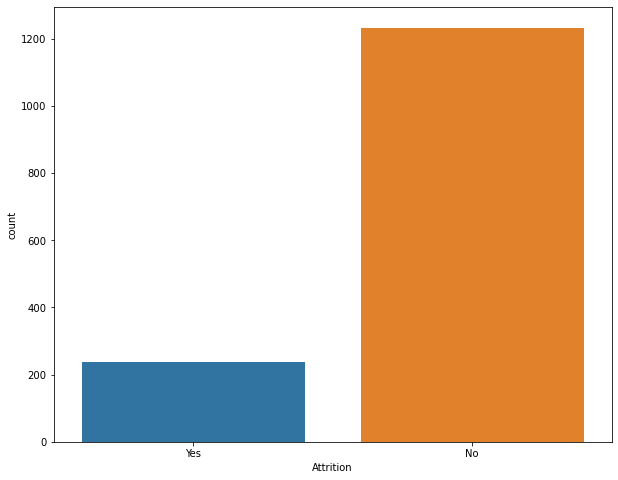

In [11]:
#Visualizing the Attrition using countplot to compare the attrition

plt.figure(figsize = (10,8))
sns.countplot(data=viz_data, x= "Attrition")

From the above countplot it clearly indicates that Attrition Rate is less 

###  Age Distribution of the Employee

In [12]:
viz_data["age_decade"] = viz_data['Age']//10*10
viz_data = viz_data.assign(Age_decade = viz_data['age_decade'])

viz_data['age_decade'] = viz_data['age_decade'].replace([10.0, 20.0, 30.0, 40.0, 50.0, 60.0],
                                                        ['10s','20s', '30s', '40s', '50s', '60s'])

Text(0.5, 1.0, 'Age Distribution of Employee')

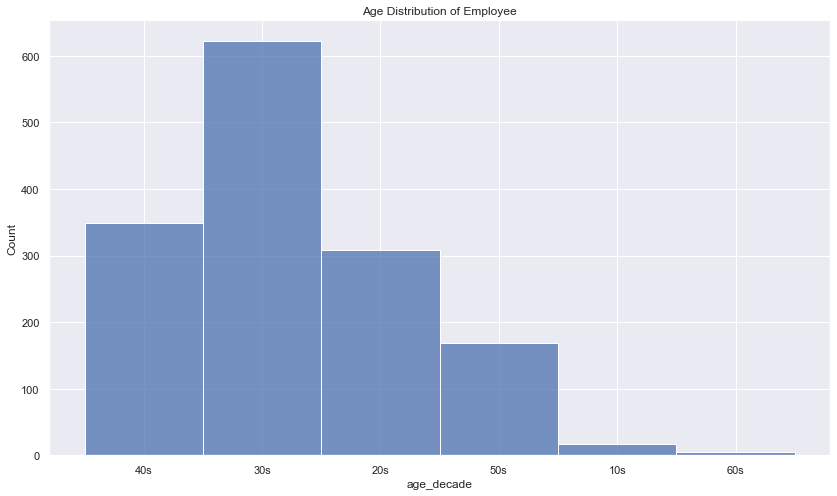

In [13]:
plt.figure(figsize = (14,8))
sns.set_theme(style="darkgrid")
ax = sns.histplot(data= viz_data, x = "age_decade", bins=10, palette= 'rocket')
plt.title("Age Distribution of Employee")

From the above plot, most of the employees are in their age of 30s.

### Visualizing different features


### Attrition by Age Group

<AxesSubplot:xlabel='age_decade', ylabel='count'>

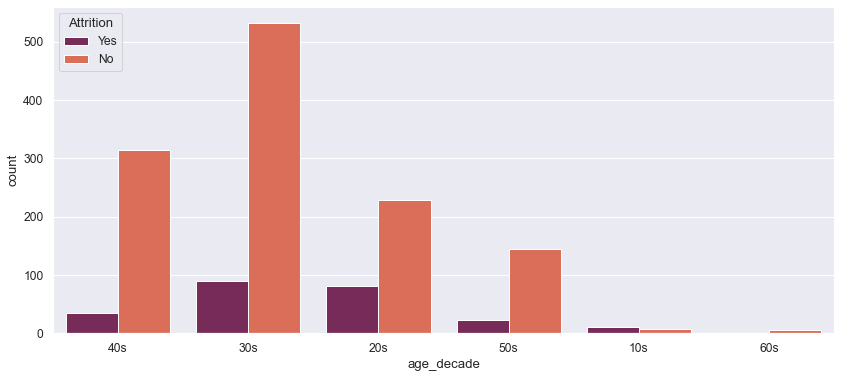

In [14]:
plt.figure(figsize=(14,6))
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=viz_data, x='age_decade', hue='Attrition', palette='rocket')

##### Attrition by Business Travel

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

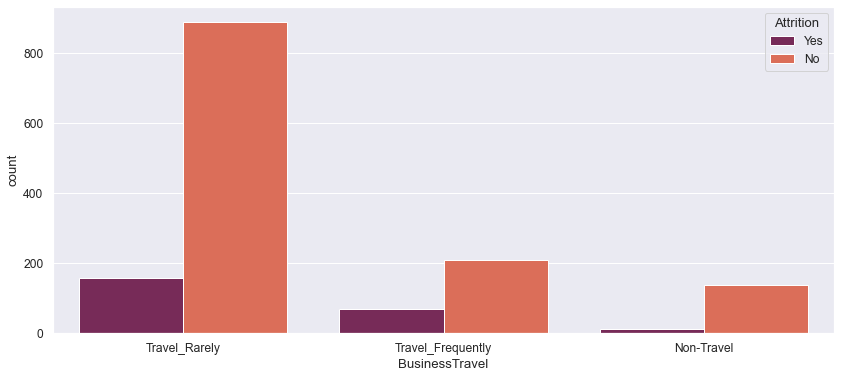

In [15]:
plt.figure(figsize=(14,6))
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=viz_data, x='BusinessTravel', hue='Attrition', palette='rocket')

###### Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition.



In [16]:
viz_data.select_dtypes(include=['int64']).dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Age_decade                  int64
dtype: object

#### Number of employee age wise

In [17]:
viz_data[['Age']].value_counts().sort_values(ascending=False).head(10)

Age
35     78
34     77
31     69
36     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [18]:
viz_data[['Age']].value_counts().sort_values(ascending=False).tail(10)

Age
56     14
58     14
23     14
21     13
20     11
59     10
19      9
18      8
60      5
57      4
dtype: int64

Most employees are in their 30s with 35 year olds having the highest count and lowest are people at around the age 60 or less than 20.



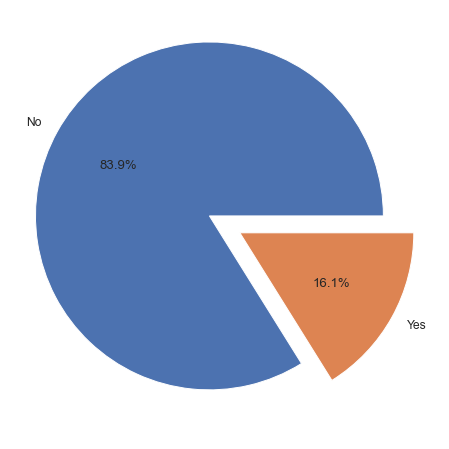

In [19]:
# let's encode the attrition column so we can use it for EDA
viz_data['Attrition'] = viz_data['Attrition'].factorize(['No','Yes'])[0]

plt.figure(figsize=(10,8))
pie = viz_data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');


84% of the employees in the dataset have not left the company.

#### How many females and males does the company have?


<AxesSubplot:>

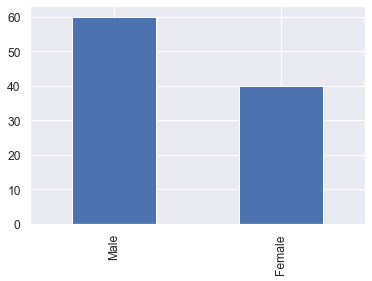

In [20]:
round(data["Gender"].value_counts()/viz_data.shape[0]*100,2).plot(kind="bar")

Male Employees are more than Female Employees

<AxesSubplot:>

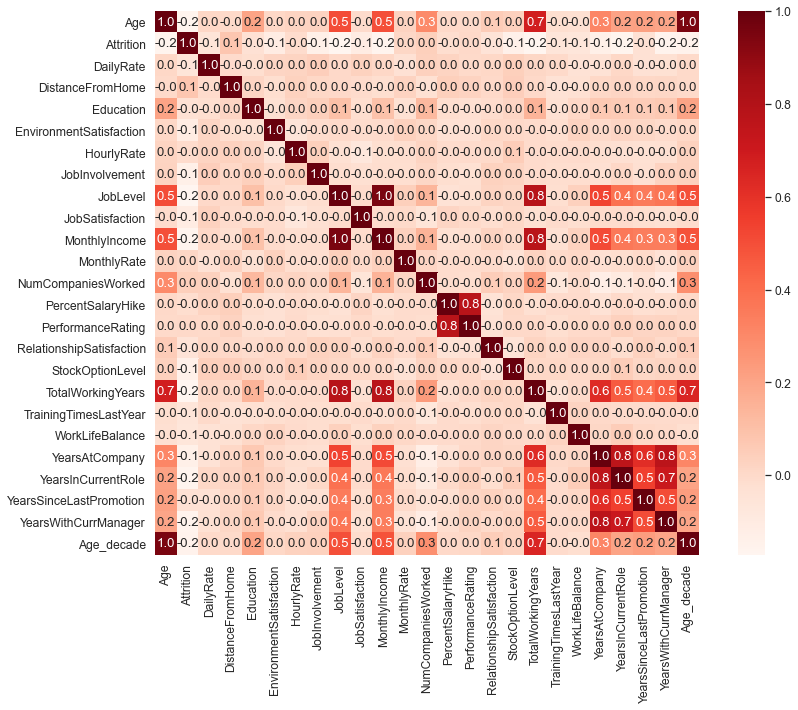

In [21]:
# We can use a heatmap to check correlation between the variables.


corr= viz_data.corr()

plt.figure(figsize =(14,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt= ".1f", cmap= "Reds")

As we can see, there isn't a very strong correlation of the target column with any of the numerical columns. But we can see other correlations such as;

More senior employees have higher total working years (very obvious).
Higher performance ratings lead to salary hike percentage to increase.
The more years an employee puts in, the more their monthly income increases.
A lot of employees remain in their current role and also under the same manager as years pass by meaning they don't get promotion and this could be a major factor contributing to attrition.

From here, we can deduct that the lack of promotions may be a crucial factor to attritions.

<AxesSubplot:xlabel='YearsAtCompany'>

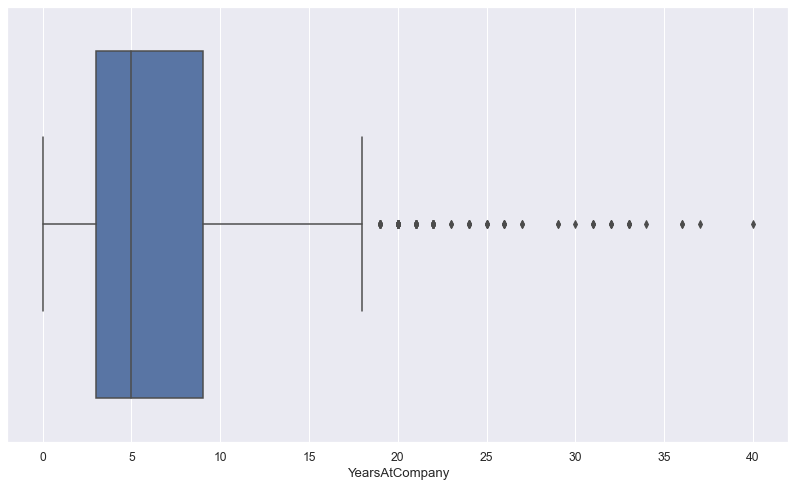

In [22]:
plt.figure(figsize =(14,8))
sns.boxplot(viz_data["YearsAtCompany"])

Most employees remain in the company for 3-9 years with median being 5 years.

Text(0.5, 1.0, 'Attrition by Department')

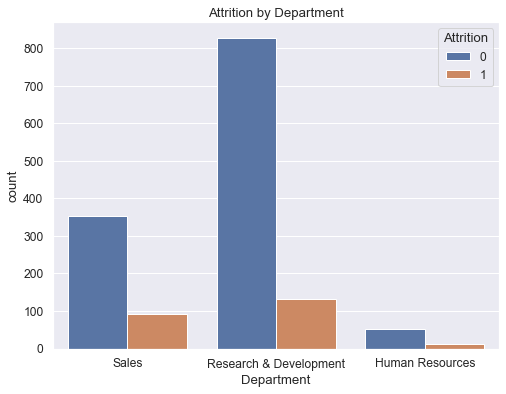

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=viz_data)
plt.title("Attrition by Department")

Most attritions are from the research & development department only for sales department to come second by a small margin. HUman resources has the least number of attritions. But R&D has a lot more employees than sales and HR.

If we considered percentage of attritions per department, we would see that the HR department has most attritions.

#### Attritions by Gender

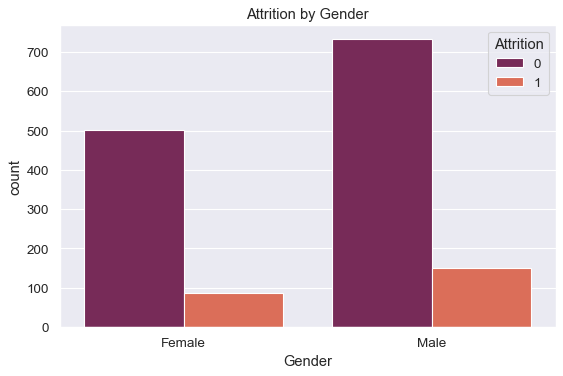

In [24]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=viz_data, x='Gender', hue='Attrition', palette='rocket').set_title('Attrition by Gender');

Clearly there are more males in the organisation than females, so attritions are higher but slightly. I don't think gender is too significant a factor behind attritions.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

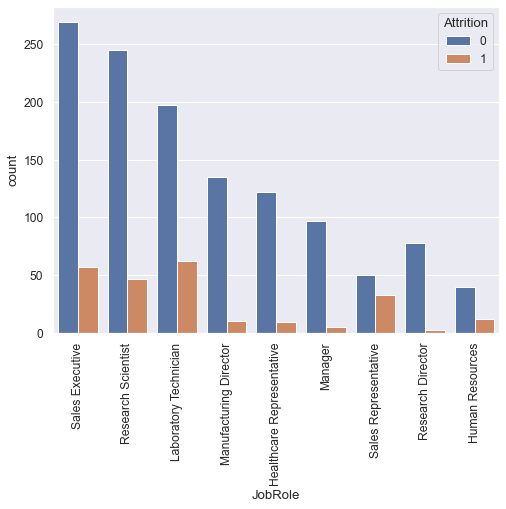

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=viz_data);
plt.xticks(rotation=90)

Among job roles, most laboratory technicians have departed from their jobs, only for research scientists, sales executives and sales representatives (% wise) to trail behind. We could look into salaries of each job roles and see if that may be the reason.



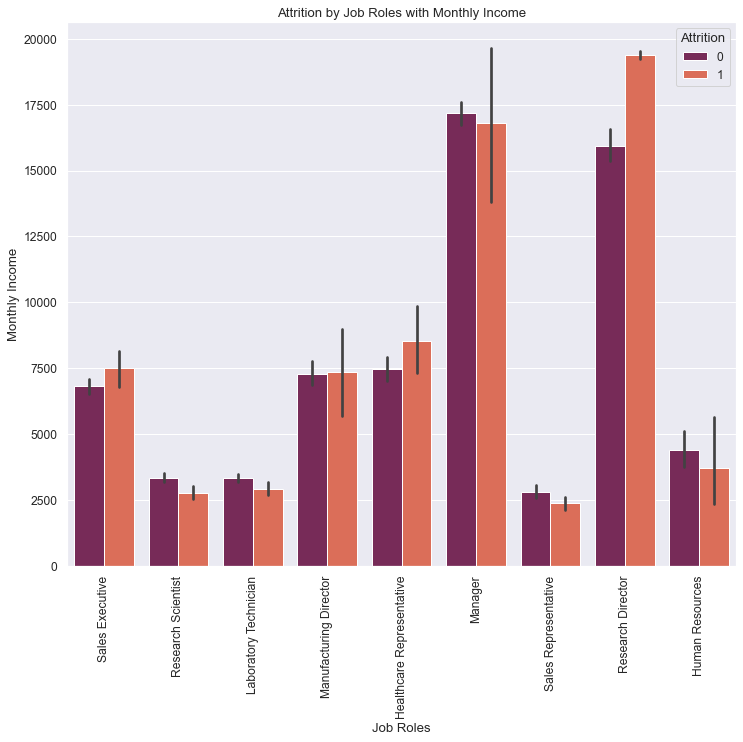

In [26]:
plt.figure(figsize=(12,10))
ax=sns.barplot(data = viz_data, x= "JobRole",y= viz_data.MonthlyIncome , hue="Attrition", palette="rocket")
plt.xticks(rotation=90)
plt.xlabel("Job Roles")
plt.ylabel("Monthly Income")
plt.title("Attrition by Job Roles with Monthly Income")
plt.show()

As doubted, laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.

Also, as we had seen earlier, the HR department had the most attritions and we can see they have very low salaries as well so once again, this is something to think about.

Text(0.5, 1.0, 'Attrition by Education Field')

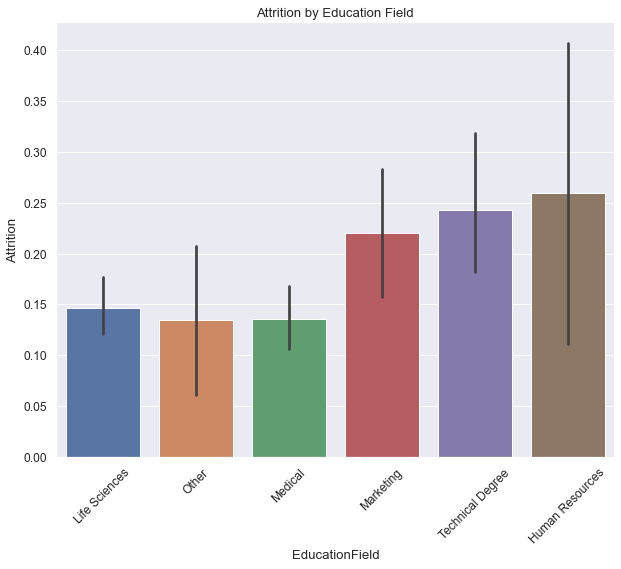

In [27]:
plt.figure(figsize =(10,8))
sns.barplot(x='EducationField', y='Attrition', data=viz_data);
plt.xticks(rotation=45)
plt.title("Attrition by Education Field")

I don't think the degrees of employees really matter here as most of the number of attritions are similar.

Working Overtime maybe the reason why employees are leaving the company. So lets see if that is the case

Text(0.5, 1.0, 'Attrition by OverTime')

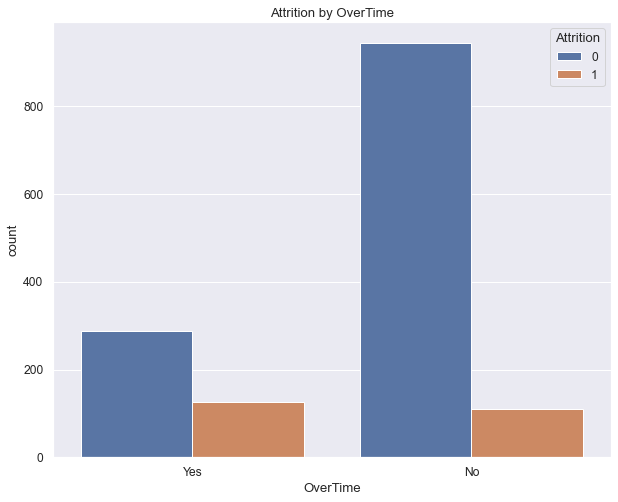

In [28]:
plt.figure(figsize= (10,8))
sns.countplot(data= viz_data, x="OverTime", hue="Attrition").set_title("Attrition by OverTime")

Overtime hours aren't a very crucial factor either.

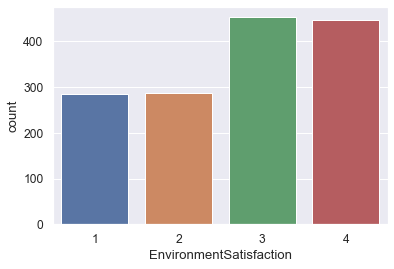

In [29]:
sns.countplot(x='EnvironmentSatisfaction', data=viz_data);

Most employees seem to be satisfied with the working environment.

### Monthly Income according to age

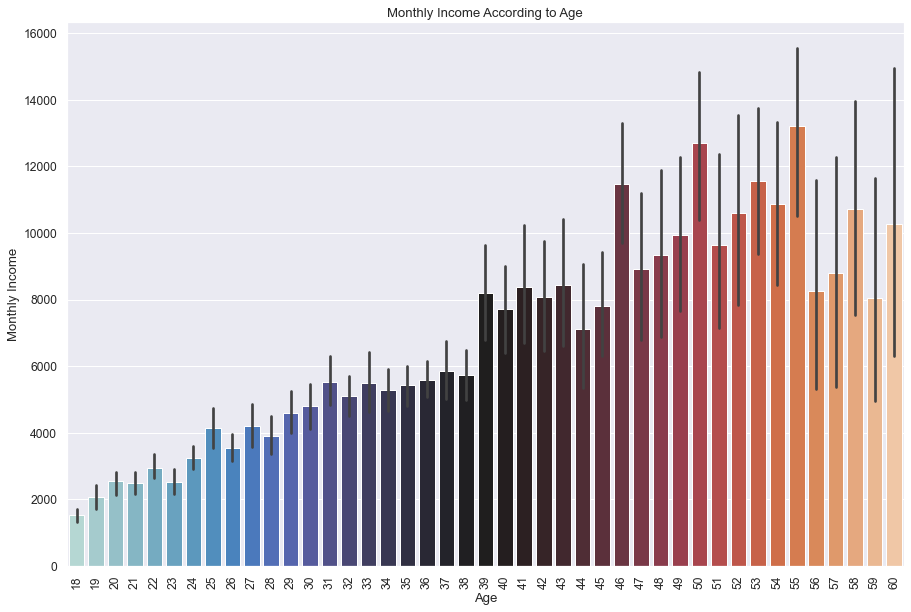

In [30]:
#age = data['Age'].value_counts()

plt.figure(figsize=(15,10))
ax=sns.barplot(data= viz_data ,x='Age',y='MonthlyIncome', palette= "icefire")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

MonthlyIncome of employees whose age are greater than 38 are likely to have greater salary as compared to those whose age are less which is obvious

What is average MonthlyIncome of the employees according to their JobRoles?

In [31]:
avg_income = viz_data.groupby("JobRole")[["MonthlyIncome"]].mean().reset_index()
avg_income

,JobRole,MonthlyIncome
0,Healthcare Representative,7528.763359
1,Human Resources,4235.750000
2,Laboratory Technician,3237.169884
3,Manager,17181.676471
4,Manufacturing Director,7295.137931
5,Research Director,16033.550000
6,Research Scientist,3239.972603
7,Sales Executive,6924.279141
8,Sales Representative,2626.000000


We can see the comparision by plotting the above values

Text(0.5, 1.0, 'Average MonthlyIncome based on Job Profiles')

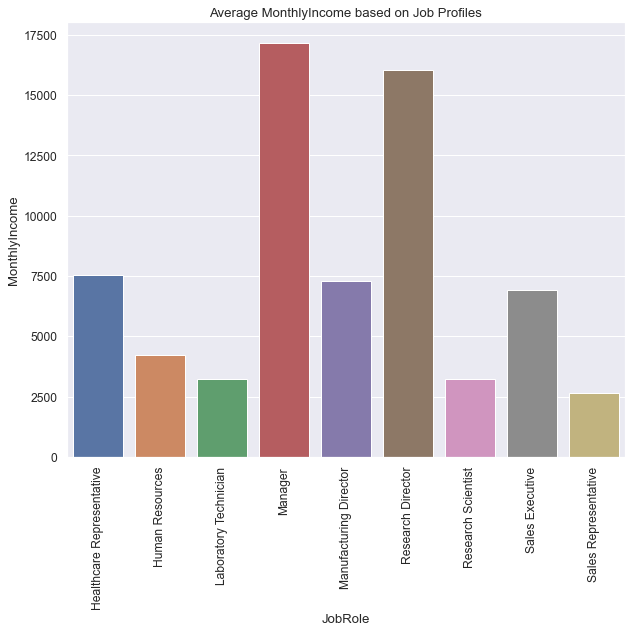

In [32]:
plt.figure(figsize = (10,8))
sns.barplot(data=avg_income,x="JobRole",y="MonthlyIncome")
plt.xticks(rotation=90)
plt.title("Average MonthlyIncome based on Job Profiles")

Manager and RD has the highest average income

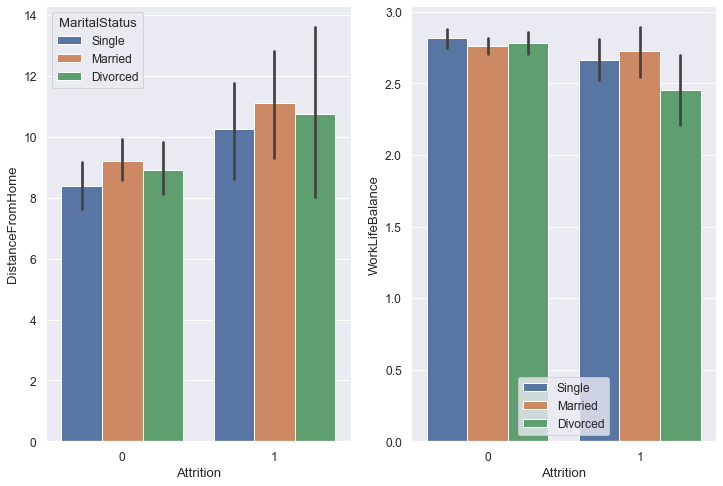

In [33]:
#Attrition based on "Marital Status"

columns = ["DistanceFromHome",
"WorkLifeBalance"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(1,2,j)
    sns.barplot(x = 'Attrition', y = viz_data[i], hue="MaritalStatus", data =viz_data)
plt.legend(loc="best")
plt.show()

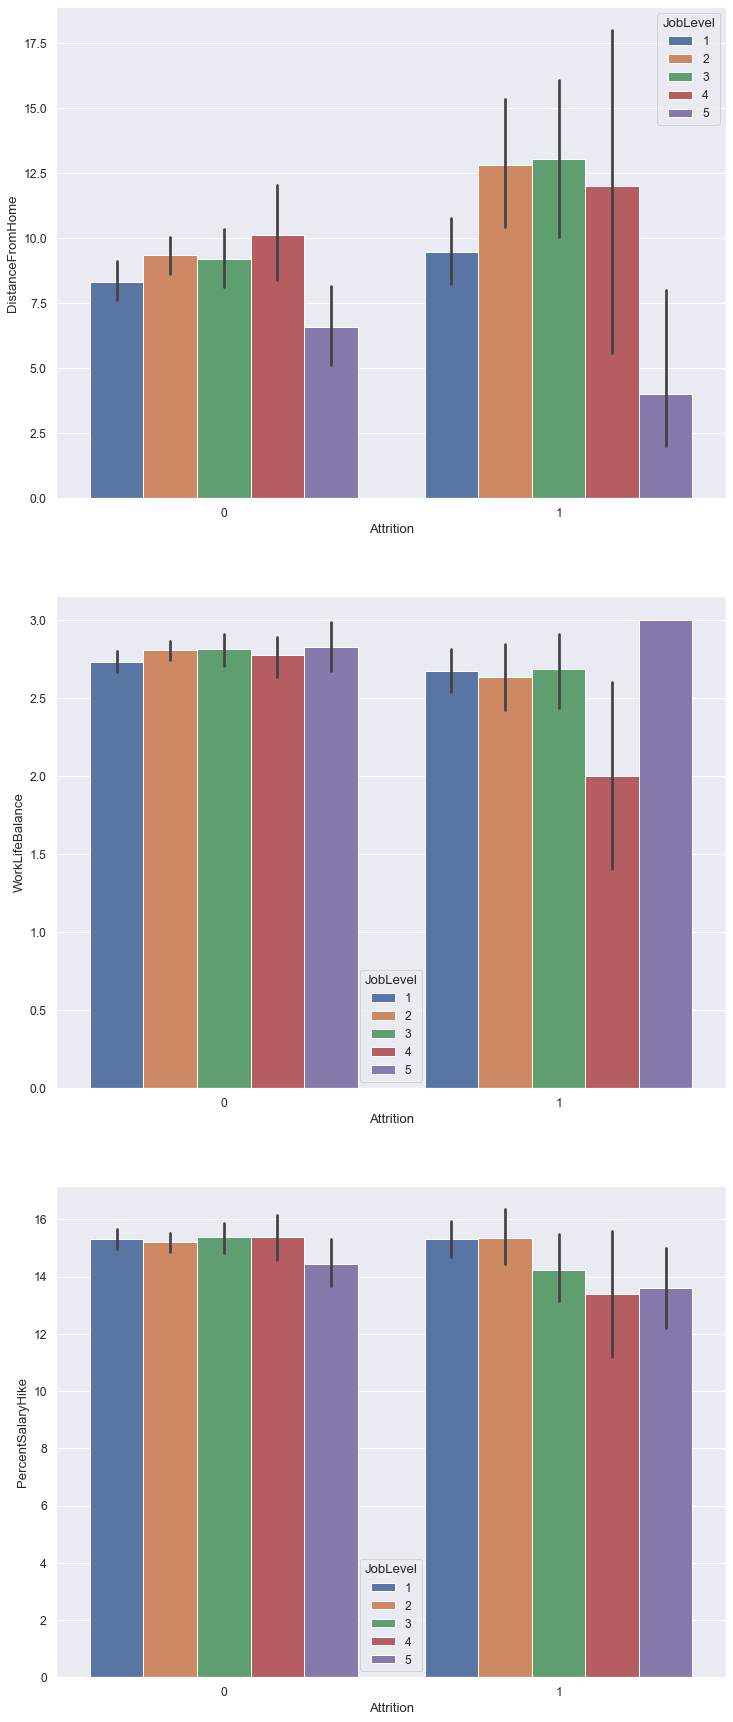

In [34]:
#Attrition based on "Job Level"
columns = ["DistanceFromHome",
"WorkLifeBalance",
"PercentSalaryHike"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(3,1,j)
    sns.barplot(x = 'Attrition', y = viz_data[i], hue="JobLevel", data =viz_data)

plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

Employees are more likely to quit, when

Distance from Home is above 8KM and (Married people are higher in this case)
Distance from Home is above 2.5 for Job Level 5


## Model Building

In [35]:
#Before moving to  model building lets do label encoding on the categorical variable
encoded = LabelEncoder()

data['Department'] = encoded.fit_transform(data['Department'])
data['Education'] = encoded.fit_transform(data['Education'])
data['JobRole'] = encoded.fit_transform(data['JobRole'])
data['Gender'] = encoded.fit_transform(data['Gender'])
data['MaritalStatus'] = encoded.fit_transform(data['MaritalStatus'])
data['Attrition'] = encoded.fit_transform(data['Attrition'])

In [36]:
# Separating the features from the target (In the process, we will drop features that we don't think are key factors.)

X = data.drop(['Attrition','BusinessTravel','EducationField','OverTime'],axis=1)  #Features

y = data['Attrition'] #Target

In [37]:
#standardizing the features
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

In [38]:
# Splitting Data for Training and Testing

X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size = 0.7, random_state = 101)

##### Building the ML Models
1. Logistic Regression Model
2. Decision Tree
3. Random Forest 

In [39]:
# Bulding a Logistic Regression Model

model = LogisticRegression(max_iter=1200)
model.fit(X_train,y_train) #Fitting the model

LogisticRegression(max_iter=1200)

In [40]:
#Lets get the coefficients used by the model
model.coef_

array([[-0.38868785, -0.09336309,  0.03400137,  0.26360163,  0.0013821 ,
        -0.43369267,  0.03521564,  0.05076055, -0.38664026, -0.44163936,
        -0.11170724, -0.21151558,  0.45392897, -0.11722868,  0.03832446,
         0.49468965, -0.19093051,  0.0716137 , -0.01361869, -0.25340162,
        -0.45984374, -0.19321064, -0.26762241,  0.39756845, -0.77517824,
         0.59411942, -0.33956673]])

In [41]:
#Now saving the predicted values in the variable 
y_pred =model.predict(X_test)
#Lets create a dataframe with actual results and predicted results
res = pd.DataFrame({"Y_test": y_test,"y_pred":y_pred})
res.head(10)

,Y_test,y_pred
353,0,0
812,0,0
449,0,0
1168,0,0
969,0,0
1065,0,0
543,0,1
629,0,0
1250,0,0
1187,0,0


In [42]:
#Calculating the accuracy of the predictions
accuracy_score(y_pred, y_test)*100

84.25655976676384

The accuracy of the model is about 84 %.

In [43]:
confusion_matrix(y_pred,y_test)

array([[833, 147],
       [ 15,  34]], dtype=int64)

In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       980
           1       0.19      0.69      0.30        49

    accuracy                           0.84      1029
   macro avg       0.59      0.77      0.60      1029
weighted avg       0.94      0.84      0.88      1029



In [45]:
#Defining a function to plot roc curve

def plot_roc_curve(model, y, x):
    auc_score = roc_auc_score(y, model.predict(x))
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.fill_between(fpr, tpr, color='orange', alpha=0.2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    
    return None

### Decision Tree

In [46]:
#tree = DecisionTreeClassifier()
params = {"criterion": ("gini", "entropy"), 
          "splitter": ("best", "random"), 
          "max_depth": np.arange(1, 20), 
          "min_samples_split": [2, 3, 4], 
          "min_samples_leaf": np.arange(1, 20)}
tree1_grid = GridSearchCV(DecisionTreeClassifier(random_state=101), params, scoring="roc_auc", n_jobs=-1, cv=5)
tree1_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='roc_auc')

## Random Forest Classifier

In [47]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
preds = rf.predict(X_test)



### ROC CURVE

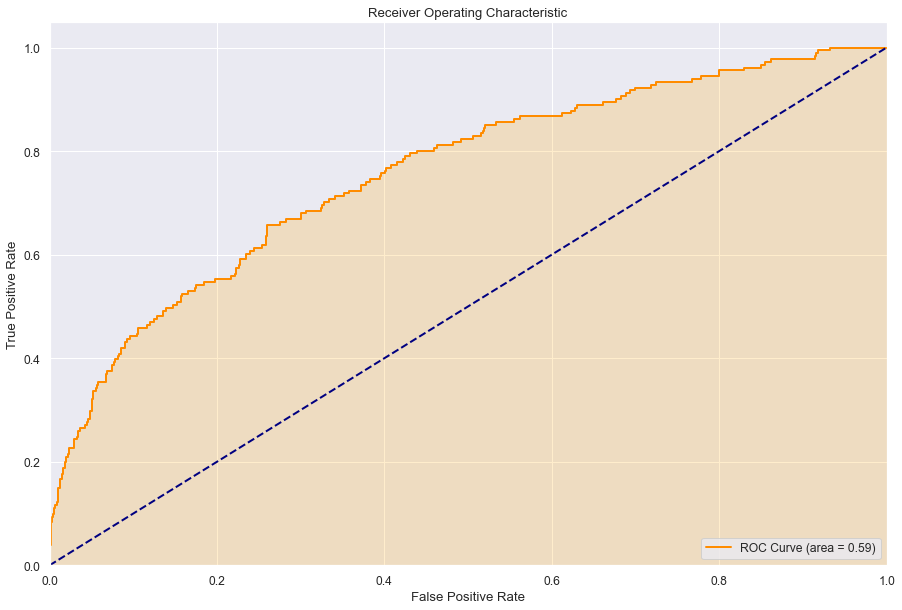

In [48]:
# ROC Curve for Logistic Regression

plot_roc_curve(model,y_test, X_test) 

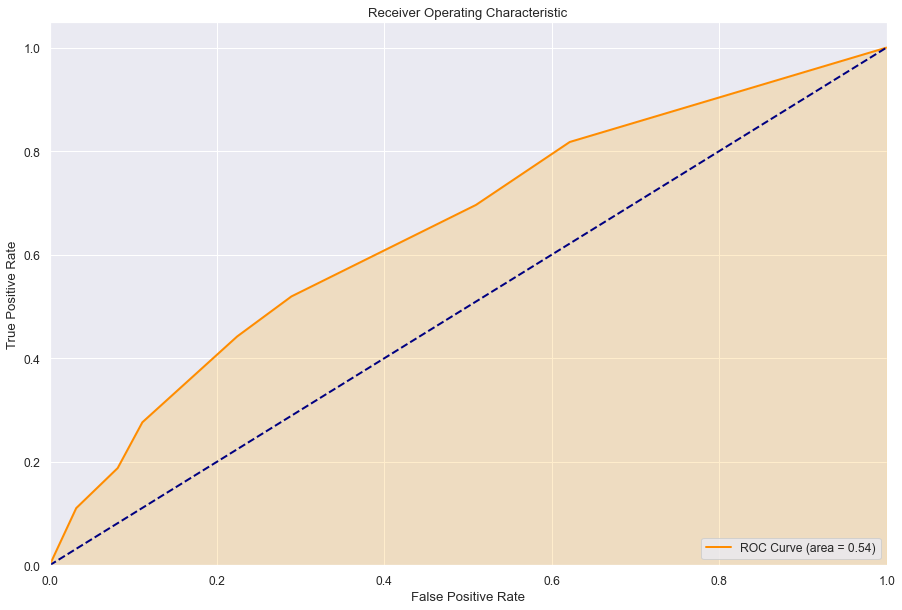

In [49]:
plot_roc_curve(tree1_grid,y_test, X_test)

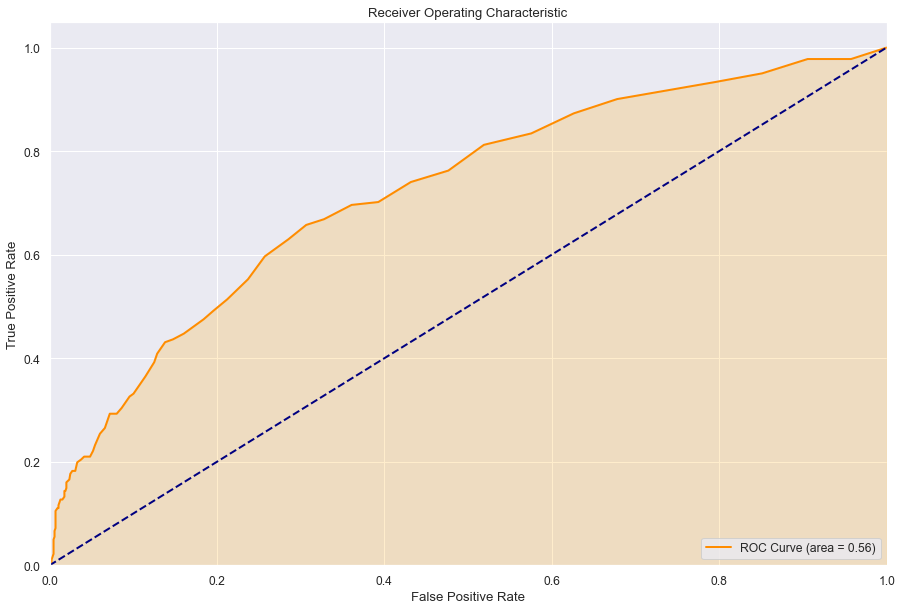

In [50]:
plot_roc_curve(rf,y_test, X_test)

Based on the above ROC Curves of all the models are under the ROC curve for Logistic Regression Model seems to be a good model since it has higher AUC score of 0.59

## Model Evaluation

In [51]:
#lets take a look at how the model well the performed using confusion matrix

#Confusion Matrix for Logistic Regressionn Model
confusion_matrix(y_test, y_pred)

array([[833,  15],
       [147,  34]], dtype=int64)

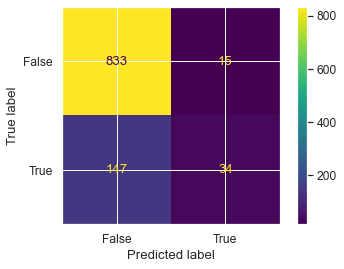

In [52]:
#lets plot the confusion matrix
plot_confusion_matrix(model,X_test, y_test, display_labels = [False, True])

In [53]:
#Let calculate the accuracy of the Logistic Regression

TP = 34
TN = 833
FP = 15
FN = 147

#Formula for accuracy is given by :
Accuracy_lr =  (TP+TN)/(TP+FP+TN+FN)
print("Accuracy for Decision Tree Mode is {}".format(Accuracy_lr))

Accuracy for Decision Tree Mode is 0.8425655976676385


In [54]:
#Lets evaluate the Decision Tree Model

print(tree1_grid.best_params_)
print(tree1_grid.best_estimator_)
print(tree1_grid.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 2, 'splitter': 'random'}
DecisionTreeClassifier(max_depth=3, min_samples_leaf=17, random_state=101,
                       splitter='random')
0.760792994883904


In [55]:
#Let predict the values 
y_preds = tree1_grid.predict(X_test)

#Let us look at the confusion matrix
confusion_matrix(y_test, y_preds)

array([[821,  27],
       [161,  20]], dtype=int64)

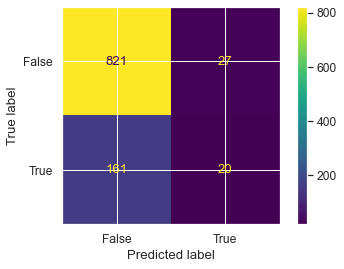

In [56]:
#Let's look at the confusion matrix by plotting it

plot_confusion_matrix(tree1_grid, X_test, y_test, display_labels=[False,True])

In [57]:
#Let calculate the accuracy of the Decision Tree Model

TP = 20
TN = 821
FP = 27
FN = 161

#Formula for accuracy is given by :
Accuracy_tree =  (TP+TN)/(TP+FP+TN+FN)
print("Accuracy for Decision Tree Mode is {}".format(Accuracy_tree))

Accuracy for Decision Tree Mode is 0.8172983479105929


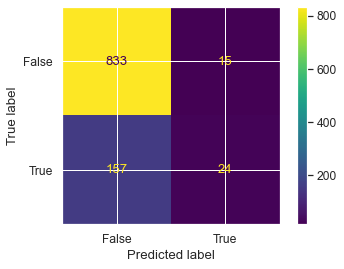

In [58]:
#Lets evaluate the Random Forest Classifier

#Let's look at the confusion matrix by plotting it

plot_confusion_matrix(rf, X_test, y_test, display_labels=[False,True])

In [62]:
#Let calculate the accuracy of the Decision Tree Model

TP = 24
TN = 833
FP = 15
FN = 157

#Formula for accuracy is given by :
Accuracy_rf =  (TP+TN)/(TP+FP+TN+FN)
print("Accuracy for Random Forest Classifier Model is {}".format(Accuracy_rf))

Accuracy for Random Forest Classifier Model is 0.8328474246841594


In [61]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       848
           1       0.62      0.13      0.22       181

    accuracy                           0.83      1029
   macro avg       0.73      0.56      0.56      1029
weighted avg       0.80      0.83      0.79      1029



### Summary

Based on the evaluation results and its accuracy score , Logistic Regression Model is likely to be found more fitted as a good model compare to Decision Tree and Random Forest